# Decision Tree Assignment
### Problem 1: Function to find Impurity
- Formula to compute the Gini Impurity of a node.
$$
I(t) = 1 - \sum_{i=1}^{K}P^2(C_{i}|t) = 1 - \sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^2
$$
where:
$t$ : node index

$i$ : class index

$K$ : number of classes

$P(C_i|t)$ : proportion of C at t th node

$N_{t,i}$ : Number of samples belonging to i-th class of t-th node

$N_{t,all}$ : total number of samples of tth node

In [ ]:
def _calc_gini(self,y): # function to calculate gini impurity of a node
    
        labels,counts = np.unique(y,return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini

### Compare the results of hand calculations and functions
- <b><u> Using hand calculation </u></b>
### Example 1:
- class 1: 15 samples, class 2: 15 samples 
$$
1 - \sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^2 = 1 - ((\frac{15}{30})^2 + (\frac{15}{30})^2) = 0.5
$$

### Example 2:
- class 1: 15 samples, class 2: 15 samples, class 3: 15 samples
$$
1 - \sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^2 = 1 - ((\frac{15}{45})^2 + (\frac{15}{45})^2 + (\frac{15}{45})^2) = 0.667
$$

### Example 3:
- class 1: 18 samples, class 2: 12 samples
$$
1 - \sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^2 = 1 - ((\frac{18}{30})^2 + (\frac{12}{30})^2) = 0.48
$$

### Example 4:
- class 1: 30 samples, class 2: 0 samples
$$
1 - \sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^2 = 1 - ((\frac{30}{30})^2 + (\frac{0}{30})^2) = 0
$$



- <b><u> Using functions to calculate the same: </u></b>
 
 I will use 1 to depict class 1: samples and 2 to depict class 2: samples and 3 for class 3: samples

In [76]:
# we will use the following function to calculate the gini impurity
import numpy as np
def _calc_gini(y):
    y_flat = np.concatenate(y)  # flatten the input array
    labels, counts = np.unique(y_flat, return_counts=True)
    _gini = 0
    for label in labels:
        _gini += (counts[labels==label]/np.sum(counts))**2
    gini = 1 - _gini
    return gini


### Example 1:
- class 1: 15 samples, class 2: 15 samples 


In [60]:
y = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]], dtype = object)
_calc_gini(y)

array([0.5])

### Example 2:
- class 1: 15 samples, class 2: 15 samples , class 3: 15 samples

In [61]:
y = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2],[3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]], dtype = object)
_calc_gini(y)

array([0.66666667])

### Example 3:
- class 1: 18 samples, class 2: 12 samples 

In [62]:
y = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[2,2,2,2,2,2,2,2,2,2,2,2]], dtype = object)
_calc_gini(y)

array([0.48])

### Example 4:
- class 1: 30 samples, class 2: 0 samples 

In [63]:
y = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[]], dtype = object)
_calc_gini(y)

array([0.])

### Problem 2: Function for obtaining information gain
- Formula to calculate information gain:
$$
IG(p) = I(p) - \frac{N_{left,all}}{N_{p,all}} I(left) - \frac{N_{right,all}}{N_{p,all}} I(right)
$$
where:

$p$ : index indicating the parent node

$left$ : index indicating left node

$right$ : index indicating right node

In [120]:
# function to calculate information gain
def _calc_ig(X,feature_index,y,threshold):
    labels_l = y[X[:,feature_index] < threshold]
    labels_r = y[X[:,feature_index] >= threshold]
    gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*_calc_gini(labels_l)
    gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*_calc_gini(labels_r)
    gain = _calc_gini(y) -gain_l -gain_r
    return gain

### Compare the results of hand calculations and functions
- <b><u> Using hand calculation </u></b>
### Example:
- left node class 1: 10 samples, left node class 2: 30 samples
- right node class 1: 20 samples, right node class 2: 5 samples

From the gain equation above: I(p) - gini impurity of root node

$$
I(p) = 1 - ((\frac{30}{65})^2 + (\frac{35}{65})^2) = 0.497
$$
gini for left node
$$
I(left) = 1 - ((\frac{10}{40})^2 + (\frac{30}{40})^2) = 0.375
$$
gini for right node
$$
I(right) = 1 - ((\frac{20}{25})^2 + (\frac{5}{25})^2) = 0.32
$$

substituting the figures for whole IG equation:

$$
IG(p) = 0.497 - \frac{40}{65}(0.375) - \frac{25}{65}(0.32) = 0.143
$$

- <b><u> Using functions to calculate the same: </u></b>
 
 I will use 1 to depict class 1: samples and 2 to depict class 2: samples.

In [79]:
# modified but similar function to calculate information gain using 
def _calc_ig(labels_l,labels_r,y):
    labels_lflat = np.concatenate(labels_l)
    labels_rflat = np.concatenate(labels_r)
    gain_l = (len(labels_lflat)/(len(labels_lflat)+len(labels_rflat)))*_calc_gini(labels_l)
    gain_r = (len(labels_rflat)/(len(labels_lflat)+len(labels_rflat)))*_calc_gini(labels_r)
    gain = _calc_gini(y) -gain_l -gain_r
    return gain

In [81]:
labels_l = np.array([[1,1,1,1,1,1,1,1,1,1],[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]],dtype = object)
labels_r = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[2,2,2,2,2]],dtype = object)
y = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]],dtype = object)
_calc_ig(labels_l, labels_r, y)

array([0.14319527])

- We can see that the function and hand calculation provides similar answer.

### Question 3: Learning

- I have written a code to perform space partitioning and generate tree graphs. I am using a randomly generated data and maximum depth of 1. 

In [84]:
import numpy as np

def space_partition(X, y):
    # Calculate the midpoint of the feature values
    midpoint = np.mean(X)

    # Split the data into two subsets based on the midpoint/ using midpoint as threshold
    left_subset = X <= midpoint
    right_subset = X > midpoint

    # Calculate the Gini impurity of the left and right subsets
    gini_left = 1 - np.sum((y[left_subset] == 0) ** 2) - np.sum((y[left_subset] == 1) ** 2)
    gini_right = 1 - np.sum((y[right_subset] == 0) ** 2) - np.sum((y[right_subset] == 1) ** 2)

    # Determine which subset has the lowest Gini impurity
    if gini_left <= gini_right:
        return {'feature': 0, 'threshold': midpoint, 'left': np.where(left_subset)[0], 'right': np.where(right_subset)[0]}
    else:
        return {'feature': 0, 'threshold': midpoint, 'left': np.where(right_subset)[0], 'right': np.where(left_subset)[0]}


In [89]:
# Generate random data to use in the above function
np.random.seed(42)
data = np.random.rand(100,2)
data_x = data[:,0]
data_y = data[:,1]


In [118]:
space_partition(data_x, data_y)

{'feature': 0,
 'threshold': 0.4810439407006581,
 'left': array([ 0,  2,  3,  5,  7,  8,  9, 11, 12, 13, 16, 18, 20, 21, 22, 23, 28,
        29, 30, 32, 33, 34, 36, 39, 41, 42, 45, 49, 50, 51, 53, 54, 55, 61,
        62, 64, 65, 66, 69, 72, 74, 76, 79, 80, 82, 83, 84, 90, 92, 95, 97],
       dtype=int64),
 'right': array([ 1,  4,  6, 10, 14, 15, 17, 19, 24, 25, 26, 27, 31, 35, 37, 38, 40,
        43, 44, 46, 47, 48, 52, 56, 57, 58, 59, 60, 63, 67, 68, 70, 71, 73,
        75, 77, 78, 81, 85, 86, 87, 88, 89, 91, 93, 94, 96, 98, 99],
       dtype=int64)}

In [116]:
import graphviz

def plot_tree(tree):
    dot = graphviz.Digraph()
    dot.node('root', 'X[0] <= {:.2f}\nSamples: {}'.format(tree['threshold'], len(tree['left']) + len(tree['right'])))
    dot.node('left', 'Samples: {}'.format(len(tree['left'])))
    dot.node('right', 'Samples: {}'.format(len(tree['right'])))
    dot.edge('root', 'left', 'True')
    dot.edge('root', 'right', 'False')
    return dot

tree = space_partition(data_x, data_y)
dot = plot_tree(tree)
dot.render(filename='decision_tree', format='png', view=True)


'decision_tree.png'

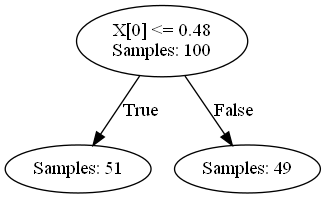

In [117]:
from IPython.display import Image

Image(filename='decision_tree.png')


#### Calculate the information gain of the parent node of function space partition.

In [136]:
def calc_gini(y):
    #y_flat = np.concatenate(y)  # flatten the input array
    labels, counts = np.unique(y, return_counts=True)
    _gini = 0
    for label in labels:
        _gini += (counts[labels==label]/np.sum(counts))**2
    gini = 1 - _gini
    return gini


In [137]:
# function to calculate information gain
def calc_ig(X,feature_index,y,threshold):
    #X = np.concatenate(X)
    labels_l = y[X[:, feature_index] < threshold]
    labels_r = y[X[:,feature_index] >= threshold]
    gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*calc_gini(labels_l)
    gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*calc_gini(labels_r)
    gain = calc_gini(y) -gain_l -gain_r
    return gain

In [138]:
# from space partition function feature index = 0, threshold = 0.48, X = data_x and y = data_y
data_x = np.array(data_x).reshape(-1,1)
calc_ig(data_x, 0, data_y, 0.48)

array([0.01])

Information gain for the parent node is 0.01

## Question 4: Presumption
- compile the code for ScratchDecesionTreeClassifierDepth1 class and add the predict method

In [140]:
 # function to calculate and return the predicted value
def predict(self, X):
        prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
        return prediction
       

- Completed decision tree code

In [144]:
class ScratchDecisionTreeClassifierDepth1():
    def __init__(self, verbose=False):
        self.verbose = verbose
        
    def fit(self, X, y):
        
        self.gain = 0
        for feature_index in range(X.shape[1]):
            self.thresholds = np.unique(X[:,feature_index])
            for threshold in self.thresholds:
                _gain = self._calc_ig(X,feature_index,y,threshold)
                if _gain > self.gain:
                    self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                    self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
                    if self.verbose:
                        print('feature',self.feature,'threshold',self.threshold,'gain',self.gain) 
             
    def _calc_gini(self,y):
    
        labels,counts = np.unique(y,return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini
      
    def _calc_ig(self, X, feature_index, y, threshold):
        
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
        gain = self._calc_gini(y) -gain_l -gain_r
        return gain
    
    def predict(self, X):
        prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
        return prediction
       

## Question 5: Learning and Estimation
- Use dataset prepared in introduction to machine learning scratch to learn and estimate the data.

In [147]:
# loading data and importing required libraries
import numpy as np
import pandas as pd
import collections
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],test_size=0.3, random_state=0)

In [148]:
clf = ScratchDecisionTreeClassifierDepth1(verbose = True)
clf.fit(X_train,y_train)

feature 0 threshold 4.4 gain [0.00661608]
feature 0 threshold 4.5 gain [0.02023743]
feature 0 threshold 4.6 gain [0.0272504]
feature 0 threshold 4.7 gain [0.04914804]
feature 0 threshold 4.8 gain [0.05674825]
feature 0 threshold 4.9 gain [0.08051913]
feature 0 threshold 5.0 gain [0.08232605]
feature 0 threshold 5.1 gain [0.10829932]
feature 0 threshold 5.2 gain [0.16933821]
feature 0 threshold 5.3 gain [0.19172982]
feature 0 threshold 5.4 gain [0.20342287]
feature 0 threshold 5.5 gain [0.24063492]
feature 2 threshold 1.7 gain [0.28824661]
feature 2 threshold 3.0 gain [0.32949954]


In [152]:
train_prediction = clf.predict(X_test)

In [153]:
train_prediction

array([2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       0])

#### Comparing it with Scikit-learn to see if it works

In [151]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],test_size=0.3, random_state=0)

In [154]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 3) # create instance of the class and set max depth of the tree
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [155]:
y_pred = tree.predict(X_test)

In [156]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

#### Comparing Accuracy, Precision and Recall

In [158]:
# accuracy score for scratch implementation
from sklearn.metrics import accuracy_score
accuracy_score(y_test, train_prediction)

0.6

In [159]:
# accuracy score for scikit learn imprementation
accuracy_score(y_test, y_pred)

0.9777777777777777

In [163]:
# precision score for scratch implementation
from sklearn.metrics import precision_score
precision_score(y_test, train_prediction, average = 'micro')

0.6

In [164]:
# precision score for scikit implementation
precision_score(y_test, y_pred, average = 'micro')

0.9777777777777777

In [166]:
# recall value for scratch implementation
from sklearn.metrics import recall_score
recall_score(y_test, train_prediction, average = 'micro')

0.6

In [167]:
# recall value for scikit implementation
recall_score(y_test, y_pred, average = 'micro')

0.9777777777777777

### Problem 6: Visualization of the decision region

In [169]:
# use 2 feature values to better visualize the decision region
iris_dataset = load_iris()
iris = load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state = 0)
clf = ScratchDecisionTreeClassifierDepth1(verbose = True)
clf.fit(X_train,y_train)

feature 0 threshold 4.5 gain [0.01470588]
feature 0 threshold 4.6 gain [0.02238806]
feature 0 threshold 4.7 gain [0.03030303]
feature 0 threshold 4.8 gain [0.03846154]
feature 0 threshold 4.9 gain [0.05555556]
feature 0 threshold 5.0 gain [0.07183908]
feature 0 threshold 5.1 gain [0.10470085]
feature 0 threshold 5.2 gain [0.18992248]
feature 0 threshold 5.4 gain [0.21877585]
feature 0 threshold 5.5 gain [0.27614379]


In [170]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def decision_region(X, y,clf):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = clf.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

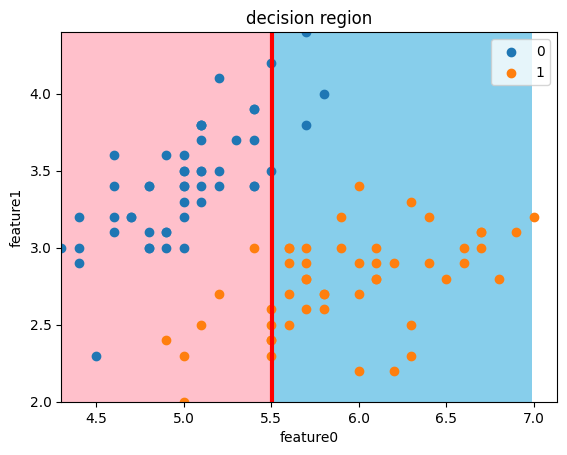

In [171]:
decision_region(X, y, clf)

## Problem 7:(Advanced Exercise) Creating a decision tree classifier class with depth 2
- 

In [233]:
class ScratchDecisionTreeClassifierDepth2():
    def __init__(self, max_depth=2, verbose=False):
        self.max_depth = max_depth
        self.verbose = verbose
        
    def fit(self, X, y, depth=0):
        
        if depth >= self.max_depth:
            self.l_label = collections.Counter(y).most_common()[0][0]
            self.r_label = collections.Counter(y).most_common()[0][0]
            return
        
        self.gain = 0
        for feature_index in range(X.shape[1]):
            self.thresholds = np.unique(X[:,feature_index])
            for threshold in self.thresholds:
                _gain = self._calc_ig(X,feature_index,y,threshold)
                if _gain > self.gain:
                    l_labels = y[X[:,feature_index] < threshold]
                    r_labels = y[X[:,feature_index] >= threshold]
                    if len(l_labels) == 0 or len(r_labels) == 0:
                        continue
                    self.l_tree = ScratchDecisionTreeClassifierDepth2(max_depth=self.max_depth, verbose=self.verbose)
                    self.l_tree.fit(X[X[:,feature_index] < threshold], l_labels, depth=depth+1)
                    self.r_tree = ScratchDecisionTreeClassifierDepth2(max_depth=self.max_depth, verbose=self.verbose)
                    self.r_tree.fit(X[X[:,feature_index] >= threshold], r_labels, depth=depth+1)
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
                    if self.verbose:
                        print('feature',self.feature,'threshold',self.threshold,'gain',self.gain) 
                
        if not hasattr(self, 'feature'):
            self.l_label = collections.Counter(y).most_common()[0][0]
            self.r_label = collections.Counter(y).most_common()[0][0]
             
    def _calc_gini(self,y):
    
        labels,counts = np.unique(y,return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini
      
    def _calc_ig(self, X, feature_index, y, threshold):
        
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
        gain = self._calc_gini(y) - gain_l - gain_r
        return gain
    
    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            tree = self
            while hasattr(tree, 'feature'):
                if x[tree.feature] < tree.threshold:
                    tree = tree.l_tree
                else:
                    tree = tree.r_tree
            predictions[i] = tree.l_label
        return predictions


In [234]:
import collections
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],test_size=0.3, random_state=0)

In [240]:
clf2 = ScratchDecisionTreeClassifierDepth2(verbose = False)
clf2.fit(X_train,y_train,depth = 2)

In [241]:
train_prediction1 = clf2.predict(X_test)

In [242]:
train_prediction1

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

## Problem 8:(Advanced exercise) Creating a decision tree classifier class with unlimited depth

In [216]:
import numpy as np
from collections import Counter

class ScratchDecisionTreeClassifierDepthInf():
    def __init__(self, max_depth=None, verbose=False):
        self.max_depth = max_depth
        self.verbose = verbose
        
    def fit(self, X, y, depth=0):
        if self.max_depth and depth >= self.max_depth:
            return
        if len(set(y)) == 1:
            self.label = y[0]
            return
        self.gain = 0
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                _gain = self._calc_ig(X, feature_index, y, threshold)
                if _gain > self.gain:
                    self.l_label = Counter(y[X[:, feature_index] < threshold]).most_common()[0][0]
                    self.r_label = Counter(y[X[:, feature_index] >= threshold]).most_common()[0][0]
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
        if self.gain == 0:
            self.label = Counter(y).most_common()[0][0]
            return
        self.left = ScratchDecisionTreeClassifierDepthInf(max_depth=self.max_depth, verbose=self.verbose)
        self.right = ScratchDecisionTreeClassifierDepthInf(max_depth=self.max_depth, verbose=self.verbose)
        self.left.fit(X[X[:, self.feature] < self.threshold], y[X[:, self.feature] < self.threshold], depth=depth+1)
        self.right.fit(X[X[:, self.feature] >= self.threshold], y[X[:, self.feature] >= self.threshold], depth=depth+1)
        
    def _calc_gini(self, y):
        labels, counts = np.unique(y, return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini
    
    def _calc_ig(self, X, feature_index, y, threshold):
        labels_l = y[X[:, feature_index] < threshold]
        labels_r = y[X[:, feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
        gain = self._calc_gini(y) - gain_l - gain_r
        return gain
    
    def predict(self, X):
        return np.array([self._predict_one(x) for x in X])
    
    def _predict_one(self, x):
        if hasattr(self, 'label'):
            return self.label
        if x[self.feature] < self.threshold:
            return self.left._predict_one(x)
        else:
            return self.right._predict_one(x)


In [223]:
import collections
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],test_size=0.3, random_state=0)

In [222]:
clf3 = ScratchDecisionTreeClassifierDepthInf(verbose = True)
clf3.fit(X_train,y_train,2)

In [231]:
train_prediction3 = clf3.predict(X_test)

In [232]:
train_prediction3

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])